In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

file_name = 'waiting_every5_2.csv'

In [2]:
results_df = pd.read_csv(file_name)


In [3]:

results_df = results_df.dropna(subset="dropoff_time") # drop cars
results_df = results_df[results_df.dropoff_time != -1] # drop passengers that left


results_df['strategy'] = results_df['strategy'].astype(str)
results_df['waitingTime'] = results_df['pickup_time'] - results_df['request_time']
results_df['travelTime'] = results_df['dropoff_time'] - results_df['pickup_time']
results_df['arrivalTime'] = results_df['waitingTime'] + results_df['travelTime']




results_df

avgs = results_df.groupby(['strategy', 'num_cars'])['waitingTime', 'travelTime', 'arrivalTime'].mean().reset_index()

avgs_df = pd.DataFrame(avgs)
groups = (avgs_df.groupby(['strategy']))






            

C:\Users\lokhe\AppData\Local\Temp\ipykernel_9380\3137216547.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgs = results_df.groupby(['strategy', 'num_cars'])['waitingTime', 'travelTime', 'arrivalTime'].mean().reset_index()


C:\Users\lokhe\AppData\Local\Temp\ipykernel_9380\818650887.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:
C:\Users\lokhe\AppData\Local\Temp\ipykernel_9380\818650887.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


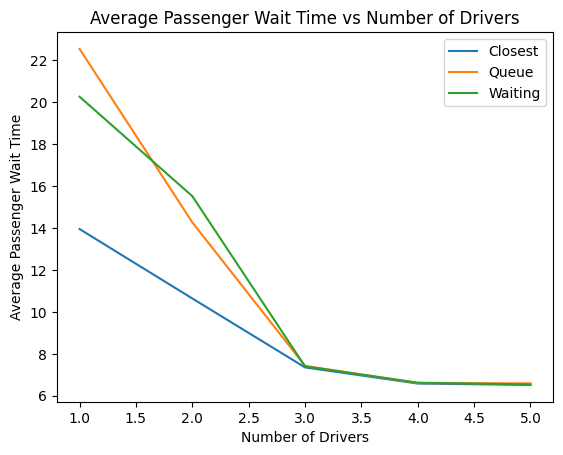

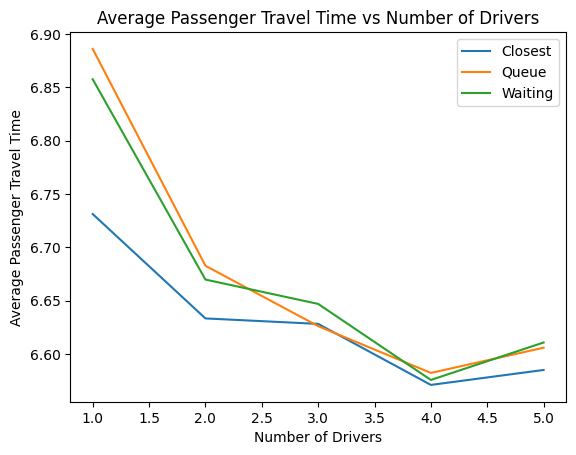

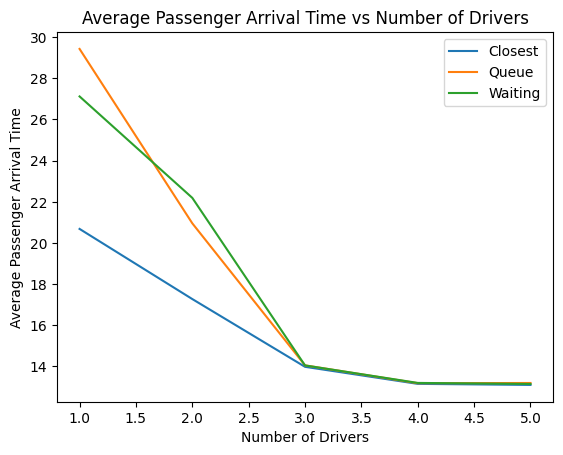

In [4]:
labels = ['Wait Time', 'Travel Time', 'Arrival Time']

for index, metric in enumerate(['waitingTime', 'travelTime', 'arrivalTime']):
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['num_cars'], group[metric], label=name)

    ax.legend()

    ax.set_xlabel('Number of Drivers')
    ax.set_ylabel(f'Average Passenger {labels[index]}')
    ax.set_title(f'Average Passenger {labels[index]} vs Number of Drivers')

    plt.legend(['Closest', 'Queue', 'Waiting'], loc='upper right')

    plt.savefig(f'figures/{metric}_every5.png')

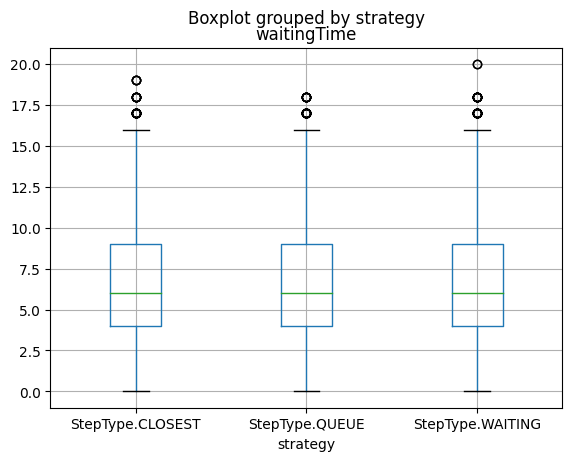

In [5]:
fig, ax = plt.subplots()

n=4
n_car = results_df[results_df["num_cars"]== n]


n_car.boxplot(column='waitingTime', by='strategy', ax=ax)
plt.savefig('figures/box.png')







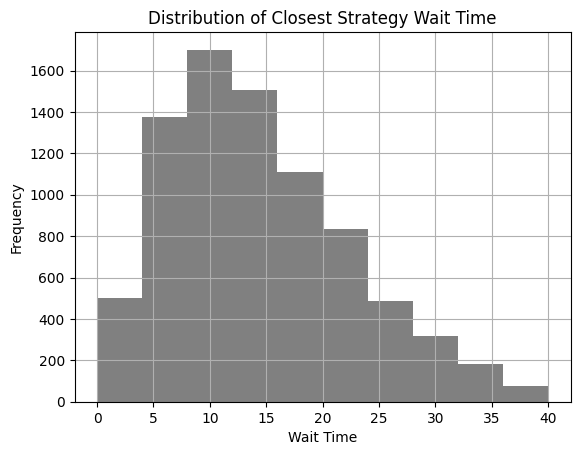

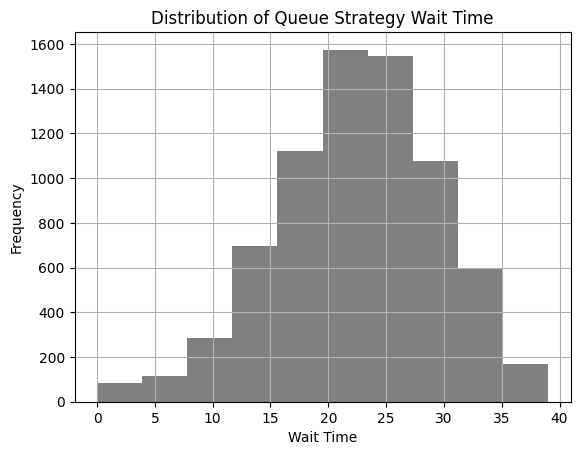

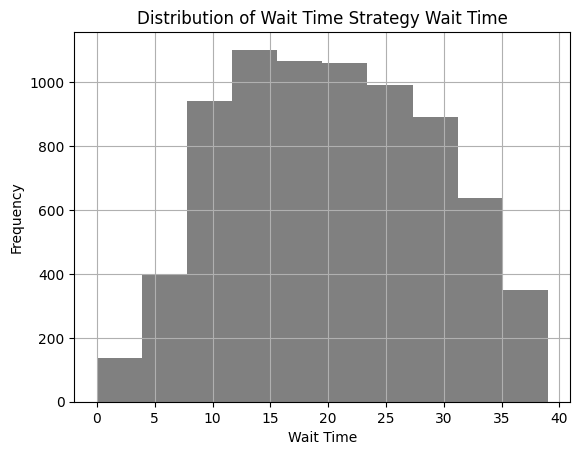

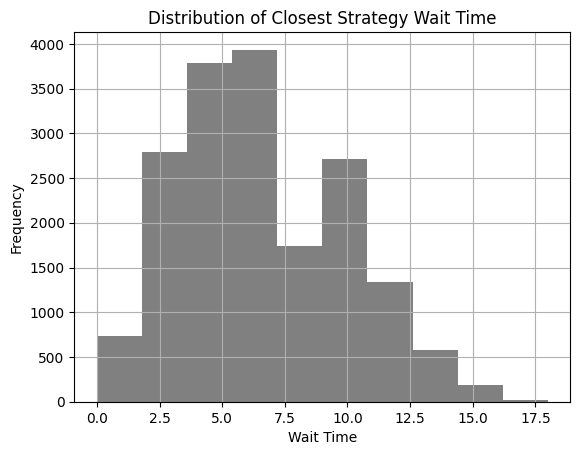

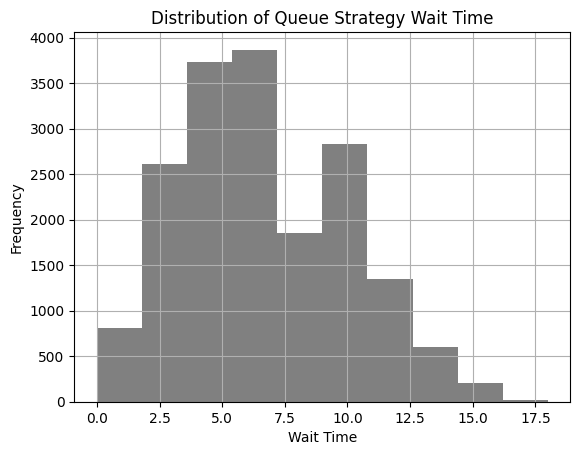

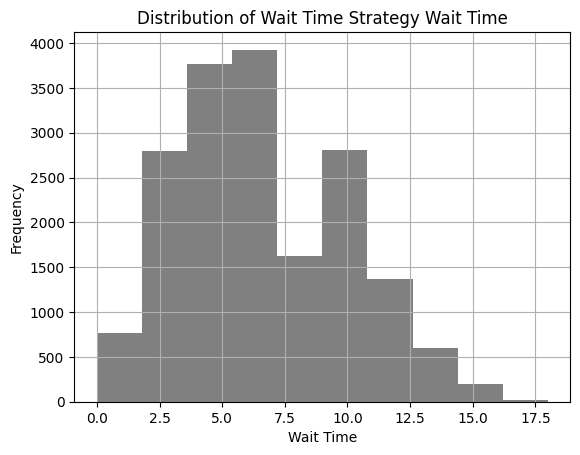

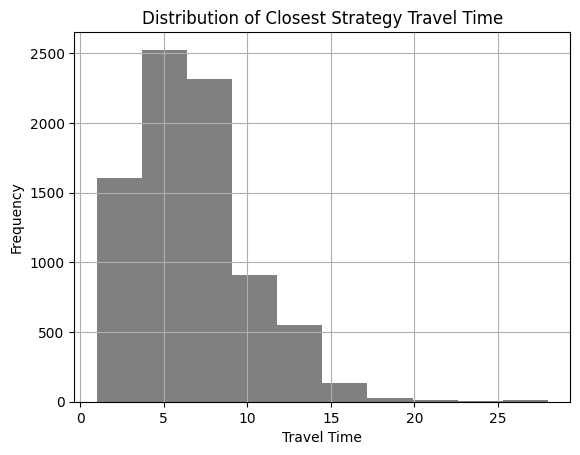

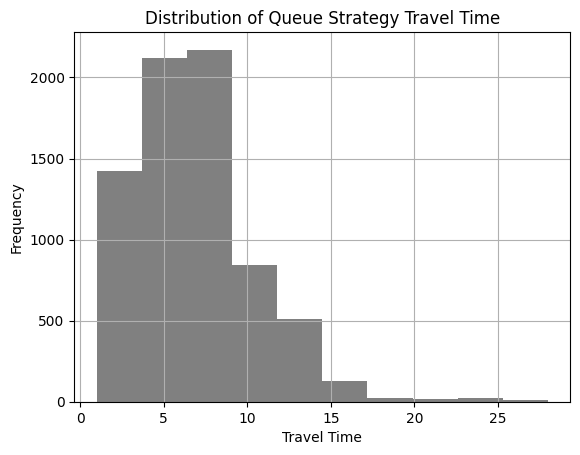

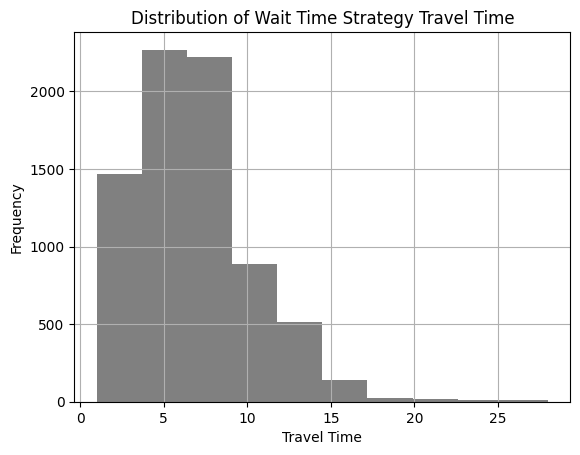

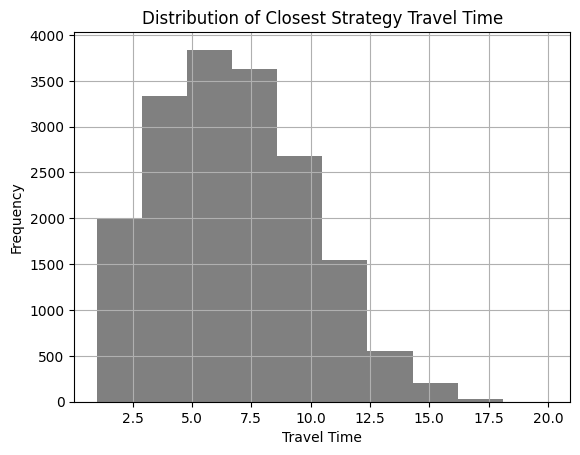

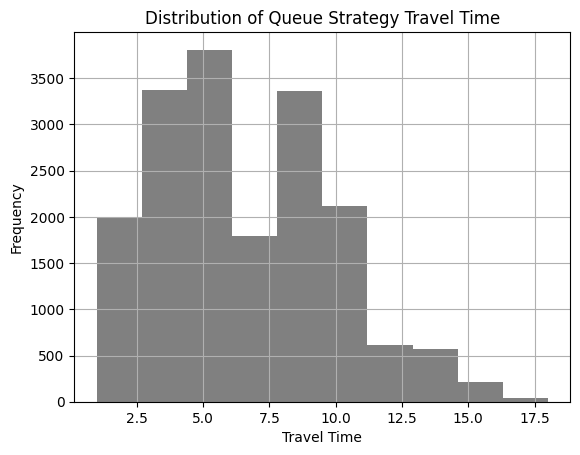

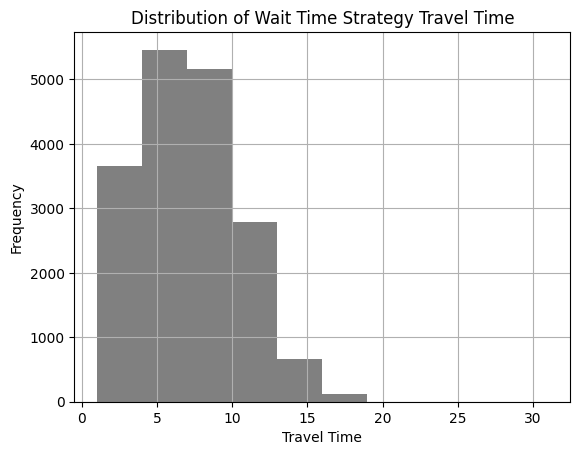

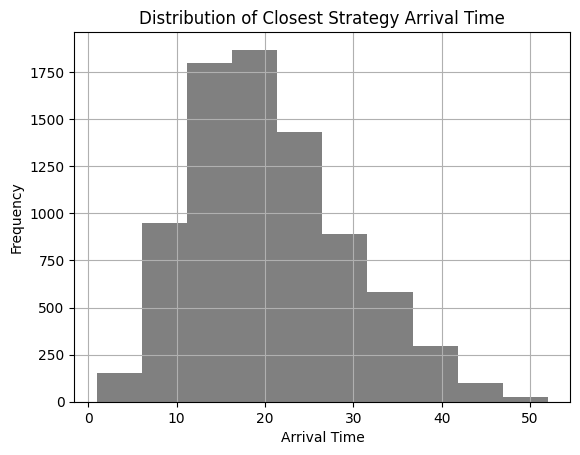

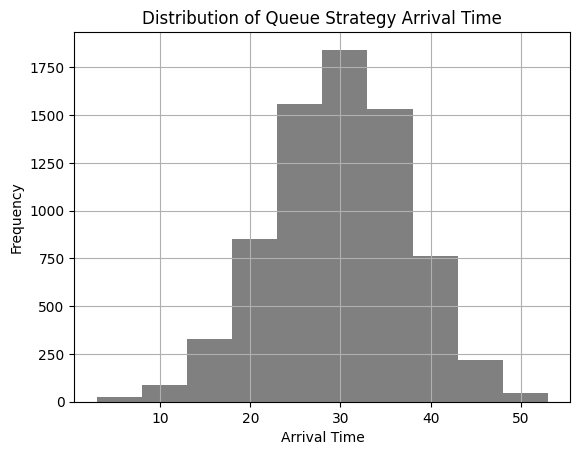

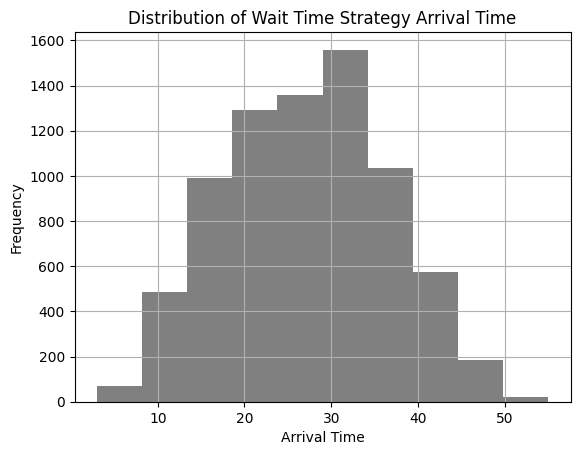

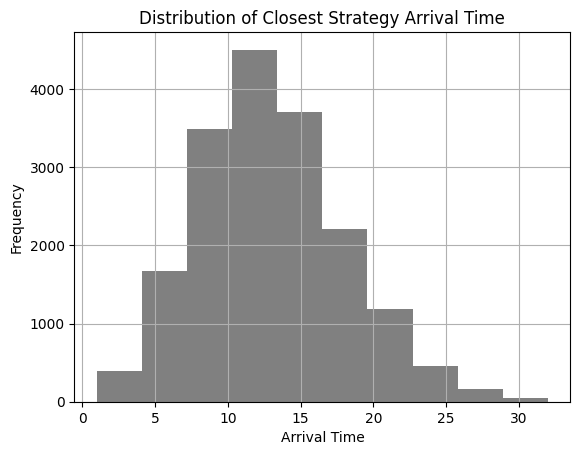

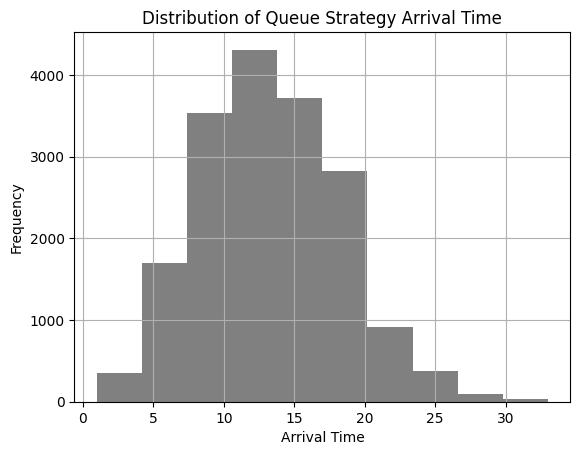

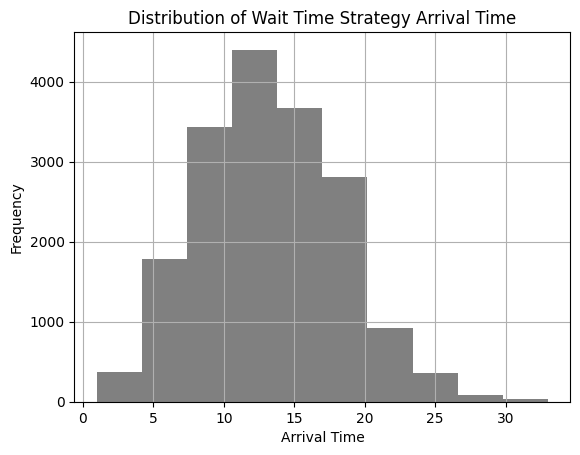

In [6]:
# HISTOGRAMS

labels = ['Wait Time', 'Travel Time', 'Arrival Time']

for index, metric in enumerate(['waitingTime', 'travelTime', 'arrivalTime']):   
    for n in [1,5]:
        n_car = results_df[results_df["num_cars"]== n]

        closest = n_car[n_car["strategy"] == "StepType.CLOSEST"]
        queue = n_car[n_car["strategy"] == "StepType.QUEUE"]
        waiting = n_car[n_car["strategy"] == "StepType.WAITING"]

        closest.hist(column=metric, color='grey')
        plt.xlabel(labels[index])
        plt.ylabel("Frequency")
        plt.title(f"Distribution of Closest Strategy {labels[index]}")
        plt.savefig(f'figures/waiting_closest_{n}.png')


        queue.hist(column=metric,  color='grey')
        plt.xlabel(labels[index])
        plt.ylabel("Frequency")
        plt.title(f"Distribution of Queue Strategy {labels[index]}")
        plt.savefig(f'figures/waiting_queue_{n}.png')


        waiting.hist(column=metric,  color='grey')
        plt.xlabel(labels[index])
        plt.ylabel("Frequency")
        plt.title(f"Distribution of Wait Time Strategy {labels[index]}")
        plt.savefig(f'figures/waiting_waiting_{n}.png')

        plt.show()